# **STROKE PREDICTION MODEL**

### **Introduction:**

According to the World Health Organization (WHO), Stroke is ranked as the 2nd leading cause of death worldwide, and causes approximately 11% of total deaths. Therefore, it is really important to know what are the possible risk factors for strokes that would help us in predicting the stroke. This dataset is used to predict a classification question of whether a patient is likely to get a stroke based on the input parameters like age, hypertension, heart disease, BMI, and average glucose level. In this dataset "healthcare-dataset-stroke-data.csv", each row in the data provides relevant information and an observation about the patient. Moreover, each column of the table respresents a particular variable, and each row corresponds to the record of a patient in this dataset. 

### **Preliminary exploratory data analysis:**

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
url <- "https://raw.githubusercontent.com/abhinavkansal08/DSCI_100_Project/main/healthcare-dataset-stroke-data.csv"

stroke_data <- read_csv(url)

head(stroke_data)
stuff <- stroke_data

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)

Warning message:
“1 parsing failure.
 row col   expected    actual                                                                                                         file
1904  -- 12 columns 8 columns 'https://raw.githubusercontent.com/abhinavkansal08/DSCI_100_Project/main/healthcare-dataset-stroke-data.csv'
”


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1


As we can see from above, the data is already in a tidy format so we can use the dataset as it is.

In [170]:
stroke_data <- stroke_data %>% 
    mutate(stroke = as_factor(stroke)) 

In [171]:
stroke_data <- stroke_data %>%
  mutate(stroke = as_factor(stroke))
glimpse(stroke_data)

Rows: 1,904
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 1043…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54,…
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, …
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "N…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", …
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", …
$ stroke            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [172]:
stroke_data %>%
  pull(stroke) %>%
  levels()

[1] "0" "1"

In [173]:
stroke_data <- stroke_data[!is.na(stroke_data$stroke),]

In [174]:
print("Number of observations and percentage in stroke")
num_obs <- nrow(stroke_data)
stroke_data %>%
  group_by(stroke) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

print("Means of the predictor variables used in our analysis")
stroke_data %>%
  summarize(across(age:heart_disease, mean, na.rm = TRUE))

stroke_data %>%
  summarize(across(avg_glucose_level: bmi, mean, na.rm = TRUE))

print("Missing data")
stroke_data %>% 
    summarise_all(~ sum(is.na(.)))

[1] "Number of observations and percentage in stroke"


`summarise()` ungrouping output (override with `.groups` argument)



stroke,count,percentage
<fct>,<int>,<dbl>
0,1654,86.9154
1,249,13.0846


[1] "Means of the predictor variables used in our analysis"


age,hypertension,heart_disease
<dbl>,<dbl>,<dbl>
45.62642,0.113505,0.06673673


Warning message in mean.default(col, ...):
“argument is not numeric or logical: returning NA”


avg_glucose_level,bmi
<dbl>,<dbl>
109.3888,NA


[1] "Missing data"


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0


[1] "Visualizations used to compare the distributions of each of the predictor variables used in our analysis."


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



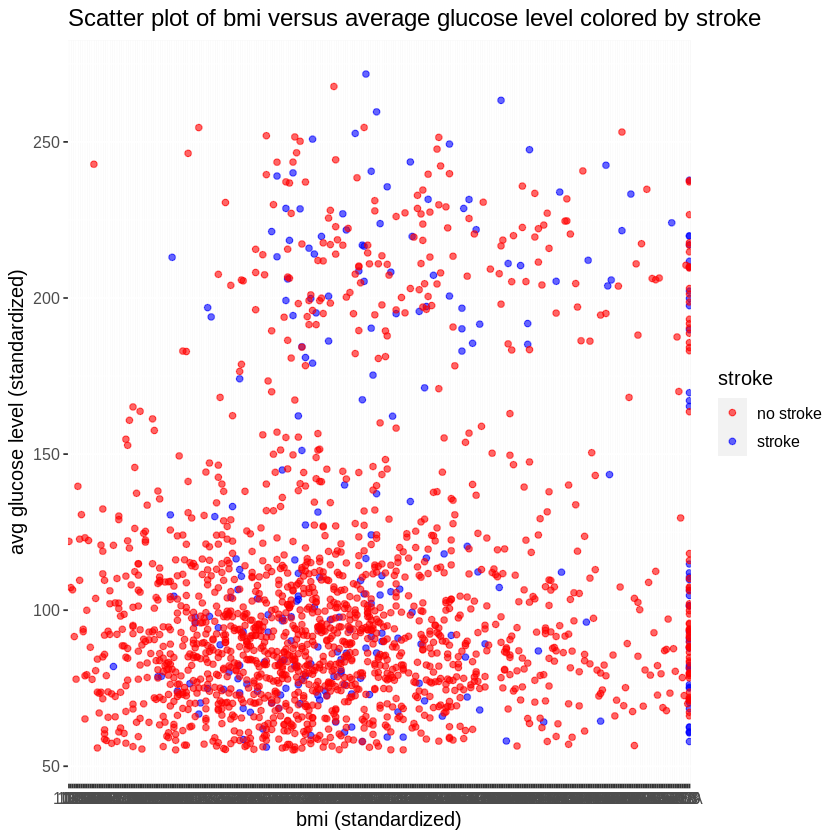

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



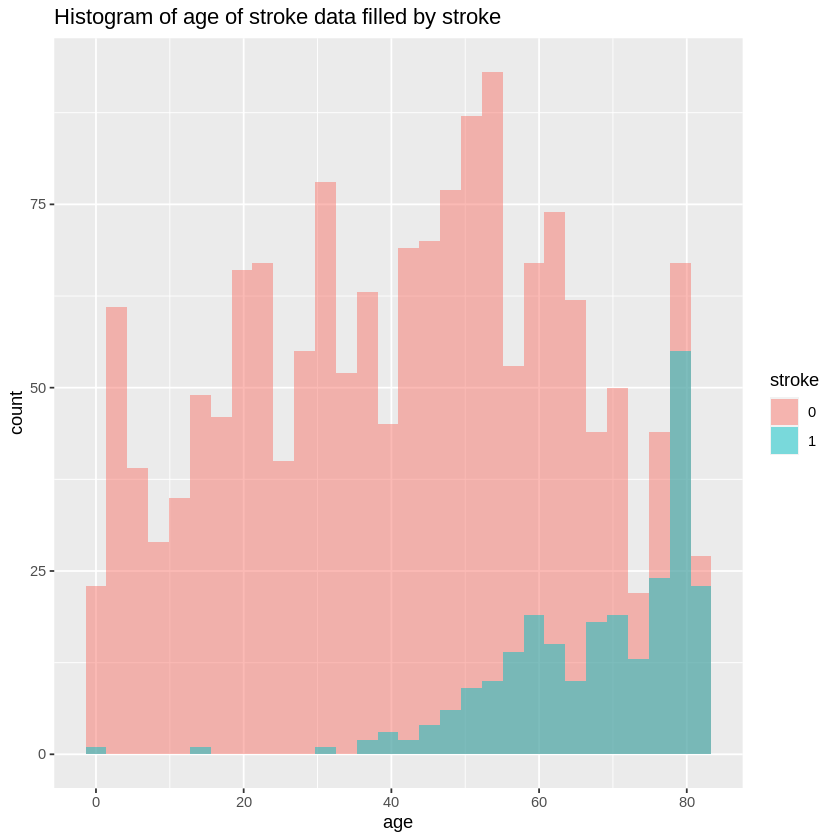

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



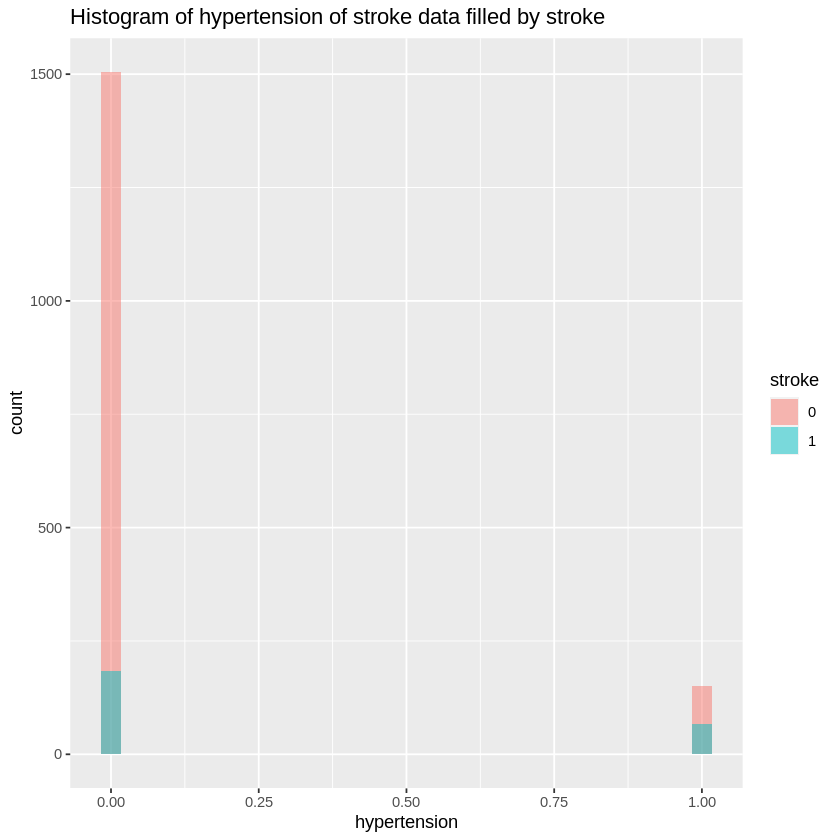

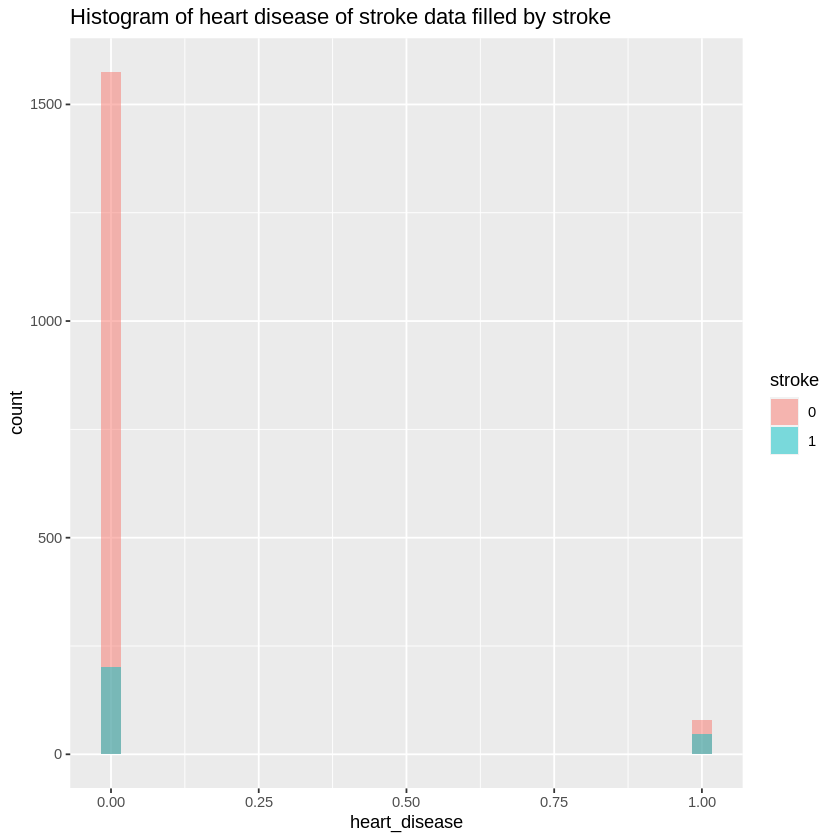

In [175]:
print("Visualizations used to compare the distributions of each of the predictor variables used in our analysis.")
stroke_plot_1 <- stroke_data %>%
  ggplot(aes(x = bmi, y = avg_glucose_level, color = stroke)) +
  ggtitle("Scatter plot of bmi versus average glucose level colored by stroke") +
  geom_point(alpha = 0.6) +
  labs(x = "bmi (standardized)", 
       y = "avg glucose level (standardized)",
       color = "stroke") +
  scale_color_manual(labels = c("no stroke", "stroke"), 
                     values = c("red", "blue")) +
  theme(text = element_text(size = 12))

stroke_plot_2 <- ggplot(stroke_data, aes(x = age, fill = stroke)) +
  ggtitle("Histogram of age of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity")  

stroke_plot_3 <- ggplot(stroke_data, aes(x = hypertension, fill = stroke)) +
  ggtitle("Histogram of hypertension of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity")

stroke_plot_4 <- ggplot(stroke_data, aes(x = heart_disease, fill = stroke)) +
  ggtitle("Histogram of heart disease of stroke data filled by stroke") +
  geom_histogram(alpha = 0.5, position = "identity") 
                                                   
stroke_plot_1
stroke_plot_2                                        
stroke_plot_3                                      
stroke_plot_4                                                   

### **Methods:**

**Explain how you will conduct either your data analysis and which variables/columns you will use**

We'll conduct our data anaylsis using Classification, i.e., using one or more variables to predict the value of a categorical variable of interest (i.e. stroke in our case). Moreover, we'll answer our predictive question using four variables/columns present in our dataset ,i.e., based on four predictor variables namely age, hypertension, heart disease, BMI, and average glucose level in our dataset. We chose these four predictor variables to predict the values of stroke because these are the four major reasons of a stroke occurence and thus would be most helpful in predicting the values of stroke.

**Describe at least one way that you will visualize the results**

We'll visualize the results using scatterplots and histograms. We'll use scatterplot for BMI and average glucose level colored by stroke, and we'll use histograms for age, hypertension, heart disease filled by stroke.

### **Expected outcomes and significance:**

**What do you expect to find?**

We expect to find the percentage of stroke using the given dataset to predict the possibility of a patient getting a stroke based on parameters like age, hypertension, heart diseage, BMI, and average glucose level present in our dataset. Moreover, we expect find a relationship among the predictor variables and the variable of interest.

**What impact could such findings have?**

Such findings would have a major impact on the expected outcomes and could also help in identifying which parameters are more strongly related to having a stroke, thus reminding people under high risk to be careful with what they do and what precationary methods they should take to avoid the possibility of a stroke.

**What future questions could this lead to?**

This could lead to a plethora of future questions such as identifying which would be the most important variable to determine the possibility of a stroke, comparisions between different parameters, and spot the most important risk factor for a stroke.